In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


Downloading dataset

In [89]:
df_train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df_train.head(5) #checking downloading

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [90]:
df_train.info() # We can notice that, all information is correctly, so we dont have Nan, in our frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [91]:
# Next, we’ll analyze our target variable, price_range

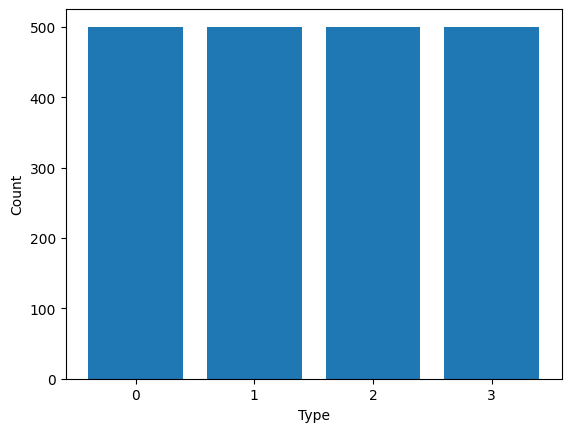

In [92]:
y_train = df_train['price_range']
counts = y_train.value_counts().sort_index()

plt.bar(counts.index, counts.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3])
plt.show()

Our target is evenly

In [93]:
#We dont have categorical types, all types is numerical, so we can not to use different Encodings, only Scaling our numerical types.

In [94]:
#Go analyze dependencies 

First of all, we will analyze, battery power - price_range, depence

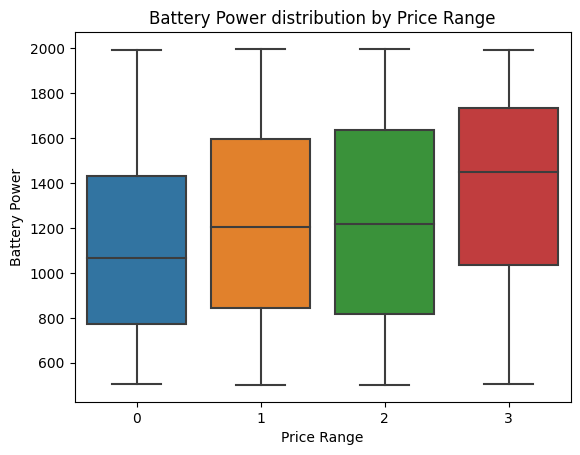

In [95]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.boxplot(x=price_range, y=battery_power)
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.title('Battery Power distribution by Price Range')
plt.show()

We can notice that the difference between 1 and 2 price_range is very small, but 0 and 3 , its big, so we can realize that, battery_power is strong variable

In [96]:
#Go check correlation par

In [97]:
#price range correlation
corr = df_train.corr()
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

Text(0.5, 1.0, 'Correlation ')

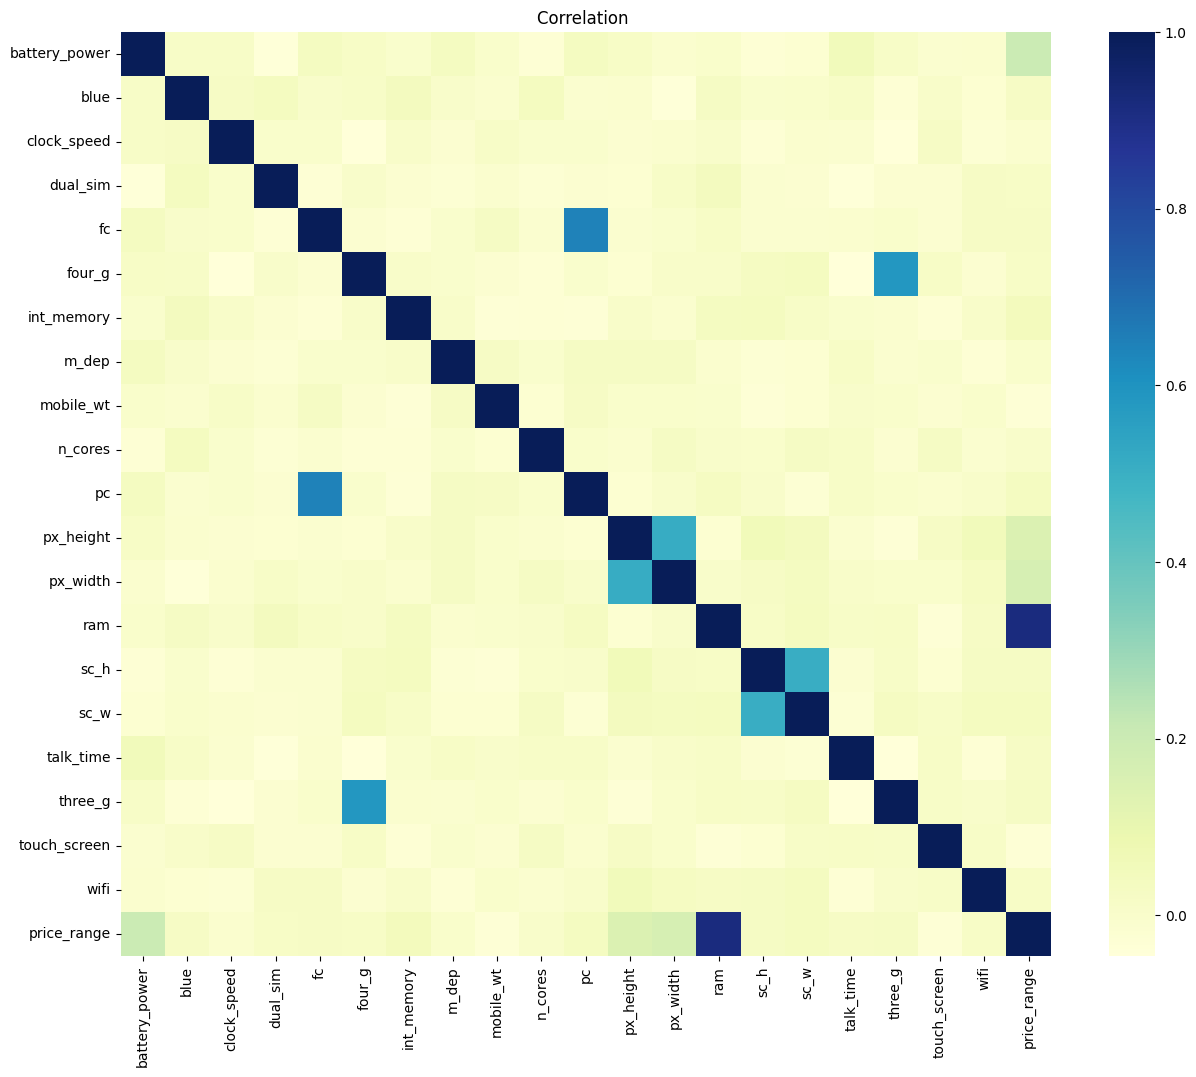

In [98]:
corr=df_train.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='YlGnBu')
r.set_title("Correlation ")

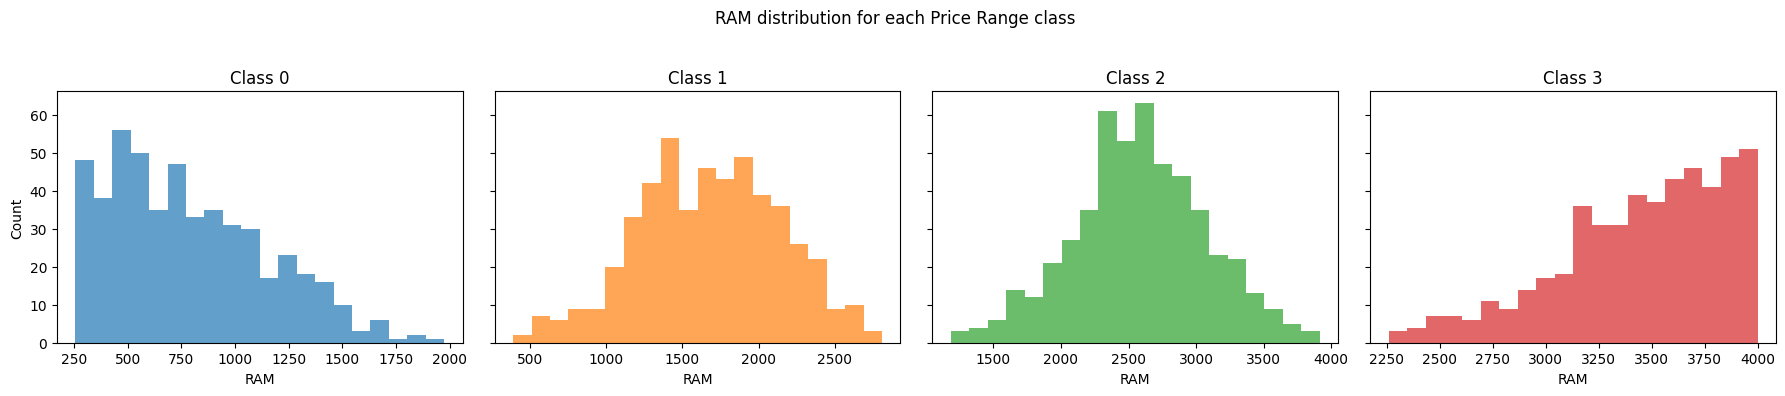

In [99]:
import matplotlib.pyplot as plt

classes = sorted(df_train['price_range'].unique())
fig, axes = plt.subplots(1, 4, figsize=(18, 4), sharey=True)

for i, cls in enumerate(classes):
    axes[i].hist(df_train[df_train['price_range'] == cls]['ram'], bins=20, color=f'C{i}', alpha=0.7)
    axes[i].set_title(f'Class {cls}')
    axes[i].set_xlabel('RAM')
    if i == 0:
        axes[i].set_ylabel('Count')

plt.suptitle('RAM distribution for each Price Range class')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [100]:
#Lets go to fit our model in different ways.
X = df_train.drop(columns = ['price_range'])
y = df_train['price_range']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state =42, test_size = 0.2)

First SVM, support vector machine.


In [101]:
from sklearn import svm
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, average_precision_score, roc_auc_score
import pandas as pd

model = svm.SVC(probability=True)
model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
roc_auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='macro')

print(roc_auc)
print(accuracy)

test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')
X_kaggle_test = test.drop('id', axis=1) 
y_pred_kaggle = model.predict(X_kaggle_test)

submission = pd.DataFrame({
    'id': test['id'],
    'price_range': y_pred_kaggle
})
submission.to_csv('submission.csv', index=False)


0.9983376283077919
0.965


In [102]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8900
